In [1]:
# Import the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv(r'C:\MY FOLDER\Project\4\movies.csv')

In [2]:
# Look at the data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
# Looking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 0%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 0%
name - 0%
rating - 0%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [4]:
# Data tyype of the coolumn

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [5]:
#change data type of the column

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [7]:
#create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [8]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [9]:
# Sort dat by gross column

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [10]:
# Drop duplicate values

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016,2016


In [11]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


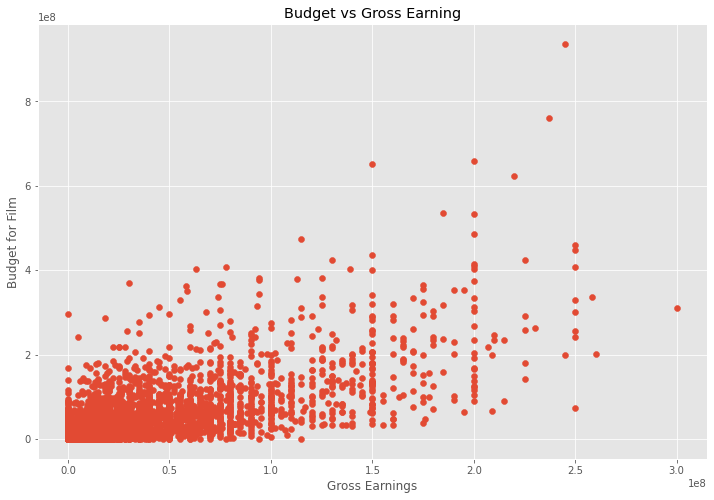

In [12]:
# Plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [28]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


<AxesSubplot:xlabel='budget', ylabel='gross'>

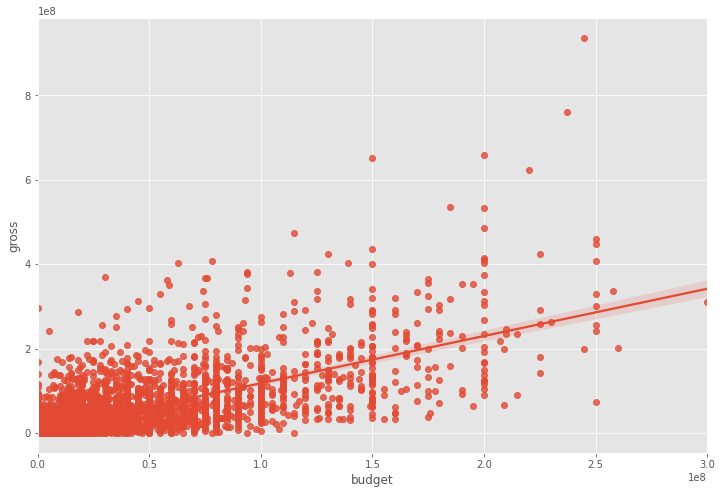

In [17]:
 # Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

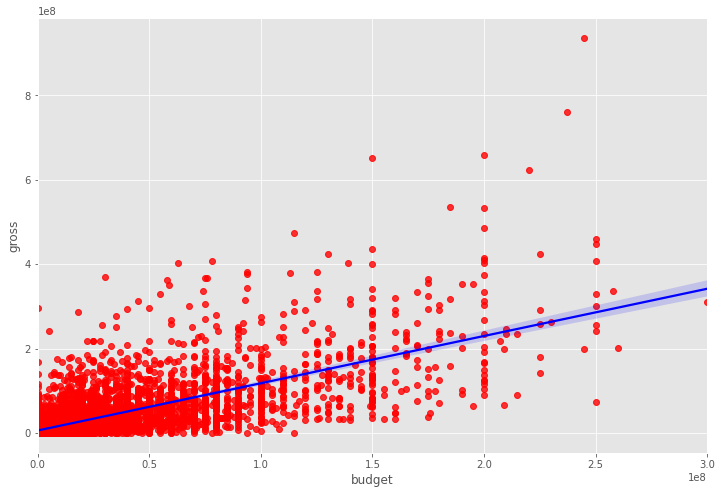

In [18]:
 # Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [20]:
# Looking correlation between numerical data

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [21]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [22]:
# Correlation Matrix between all numeric columns
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [23]:
# Correlation Matrix between all numeric columns
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


In [24]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


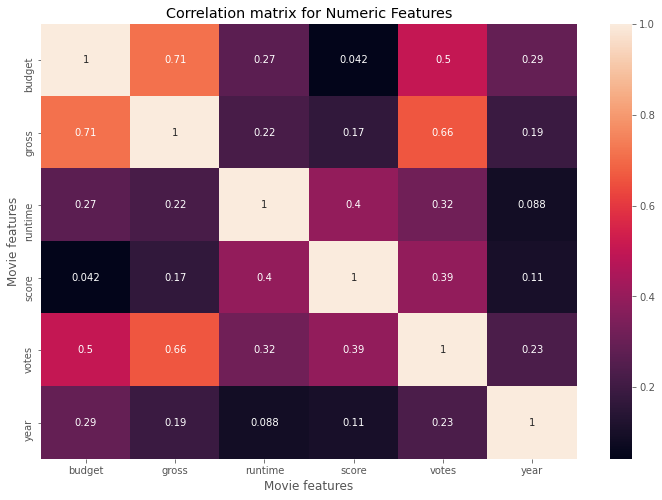

In [26]:
# Correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
# numerized

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


In [29]:
#compare

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


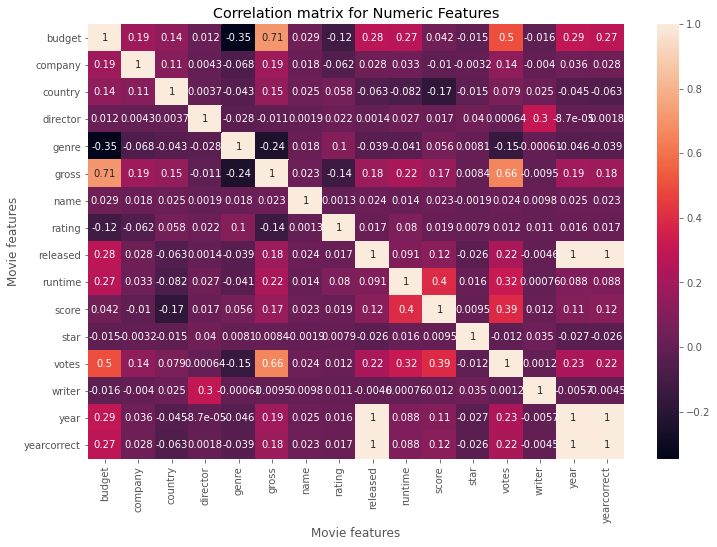

In [33]:
# Correlation numerized

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [35]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget       budget         1.000000
             company        0.187205
             country        0.137635
             director       0.011602
             genre         -0.346794
                              ...   
yearcorrect  star          -0.026052
             votes          0.220797
             writer        -0.004546
             year           0.996229
             yearcorrect    1.000000
Length: 256, dtype: float64

In [36]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.346794
budget       genre         -0.346794
gross        genre         -0.242676
genre        gross         -0.242676
score        country       -0.174414
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [37]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
released     year           0.996187
year         released       0.996187
yearcorrect  year           0.996229
year         yearcorrect    0.996229
yearcorrect  released       0.999389
released     yearcorrect    0.999389
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
y